# 3_Supervised ML Classification_IBM ML Certifiation_Coursera HEc_Final Project.


## Project Requirements:
### Project Requirement 1.
The main objective of the analysis that specify whether the proposed model will be focused on prediction or interpretation and the benefits that your analysis provides to the business or stakeholders of this data.

### Project Requirement 1 Response - Titanic Dataset Analysis:

The analysis of the Titanic dataset can be approached with a dual focus on both prediction and interpretation. 

1. Prediction:
   The primary aim is to build a predictive model that can accurately forecast whether a passenger survived or not based on various features such as age, gender, class, and embarkation point.
   
   Benefits: This predictive capability can be valuable for multiple stakeholders, including cruise operators, safety regulators, and potential passengers. Cruise operators can use the model to enhance safety measures and emergency preparedness, regulators can enforce better safety standards, and potential passengers can make more informed decisions.

2. Interpretation:
   In addition to prediction, the analysis should delve into the factors that significantly influence survival rates. Understanding the patterns and correlations in the dataset provides insights into the dynamics of survival on the Titanic.

   Benefits: Stakeholders can gain a deeper understanding of the underlying factors contributing to survival. For example, it might reveal whether certain demographics had a higher chance of survival, leading to targeted safety measures. This interpretative aspect enhances the decision-making process and contributes to a broader comprehension of the events.

# Loading Libraries and Dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# loading titanik dataset
titanik = sns.load_dataset('titanic')
titanik.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Project Requirement 2.

Description of the dataset (titanic) chosen, a summary of its attributes, and an outline of accomplishments with this analysis.

### Project Requirement 2 Response - Titanic Dataset Description and Summary:
1. Dataset Description:
The Titanic dataset is a well-known dataset in the field of data science and machine learning. It contains information about passengers who were aboard the Titanic, including whether they survived or not. The dataset is often used for predictive modeling and analysis.

2. Summary of Attributes:
The dataset typically includes the following attributes:

Survived: Binary variable indicating whether the passenger survived (1) or not (0).\
Pclass: Passenger class (1st, 2nd, or 3rd).\
Sex: Gender of the passenger.\
Age: Age of the passenger.\
SibSp: Number of siblings/spouses aboard.\
Parch: Number of parents/children aboard.\
Fare: Passenger fare.\
Deck: Cabin number.\
Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).\

In [3]:
# Dataset information.
titanik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
# Summary statistics of numerikal features.
titanik.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Checking for missing values.
titanik.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

 The following Features have missing values in the titanik dataset.
 1. age:         177 missing values
 2. embarked:    2 missing values
 3. deck:        688 missing values
 4. embark_town: 2 missing values

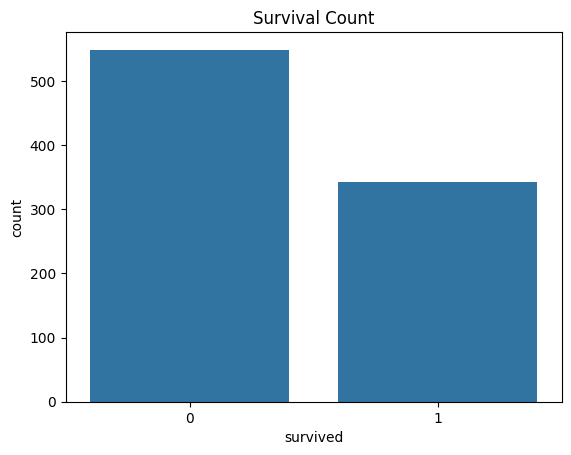

In [6]:
# Visualize survival counts.
sns.countplot(x='survived', data=titanik);
plt.title('Survival Count');


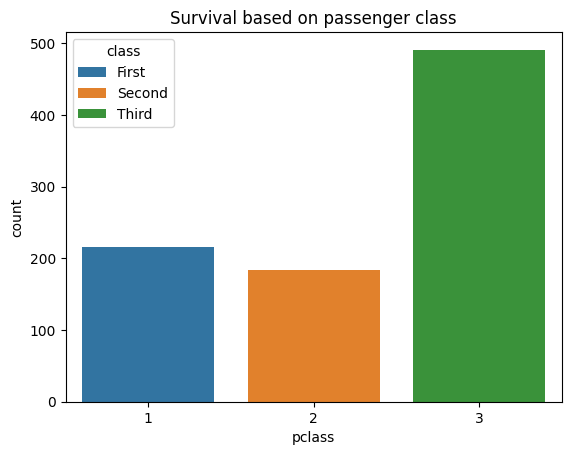

In [7]:
# Visualize survival based on passenger class
sns.countplot(x='pclass', data=titanik, hue='class');
plt.title('Survival based on passenger class');

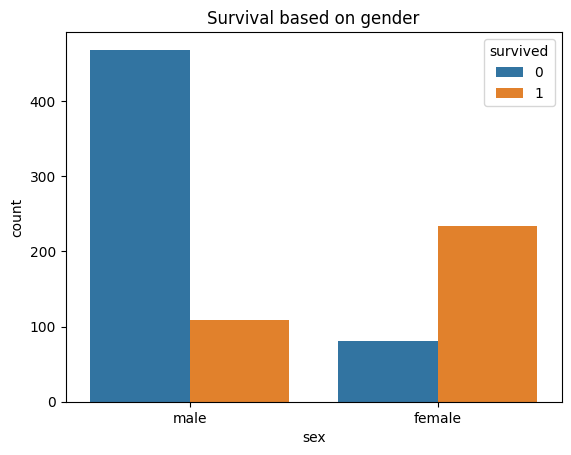

In [8]:
 # Visualize survival based on gender
sns.countplot(x='sex', data=titanik, hue='survived' );
plt.title('Survival based on gender');


# Summary of the data distribution graphs. 

In [9]:
titanik.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


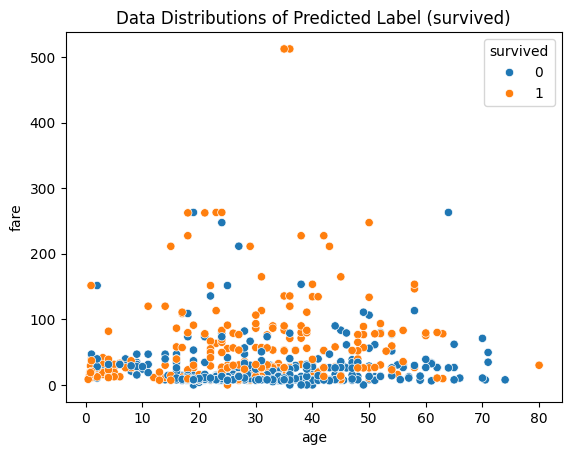

In [21]:
sns.scatterplot(y='fare', x='age', data=titanik, hue='survived');
plt.title('Data Distributions of Predicted Label (survived)');

Conclusion: The person who paid more has higher survival rate.

# Plots showing the relation between features and the outcome variable.

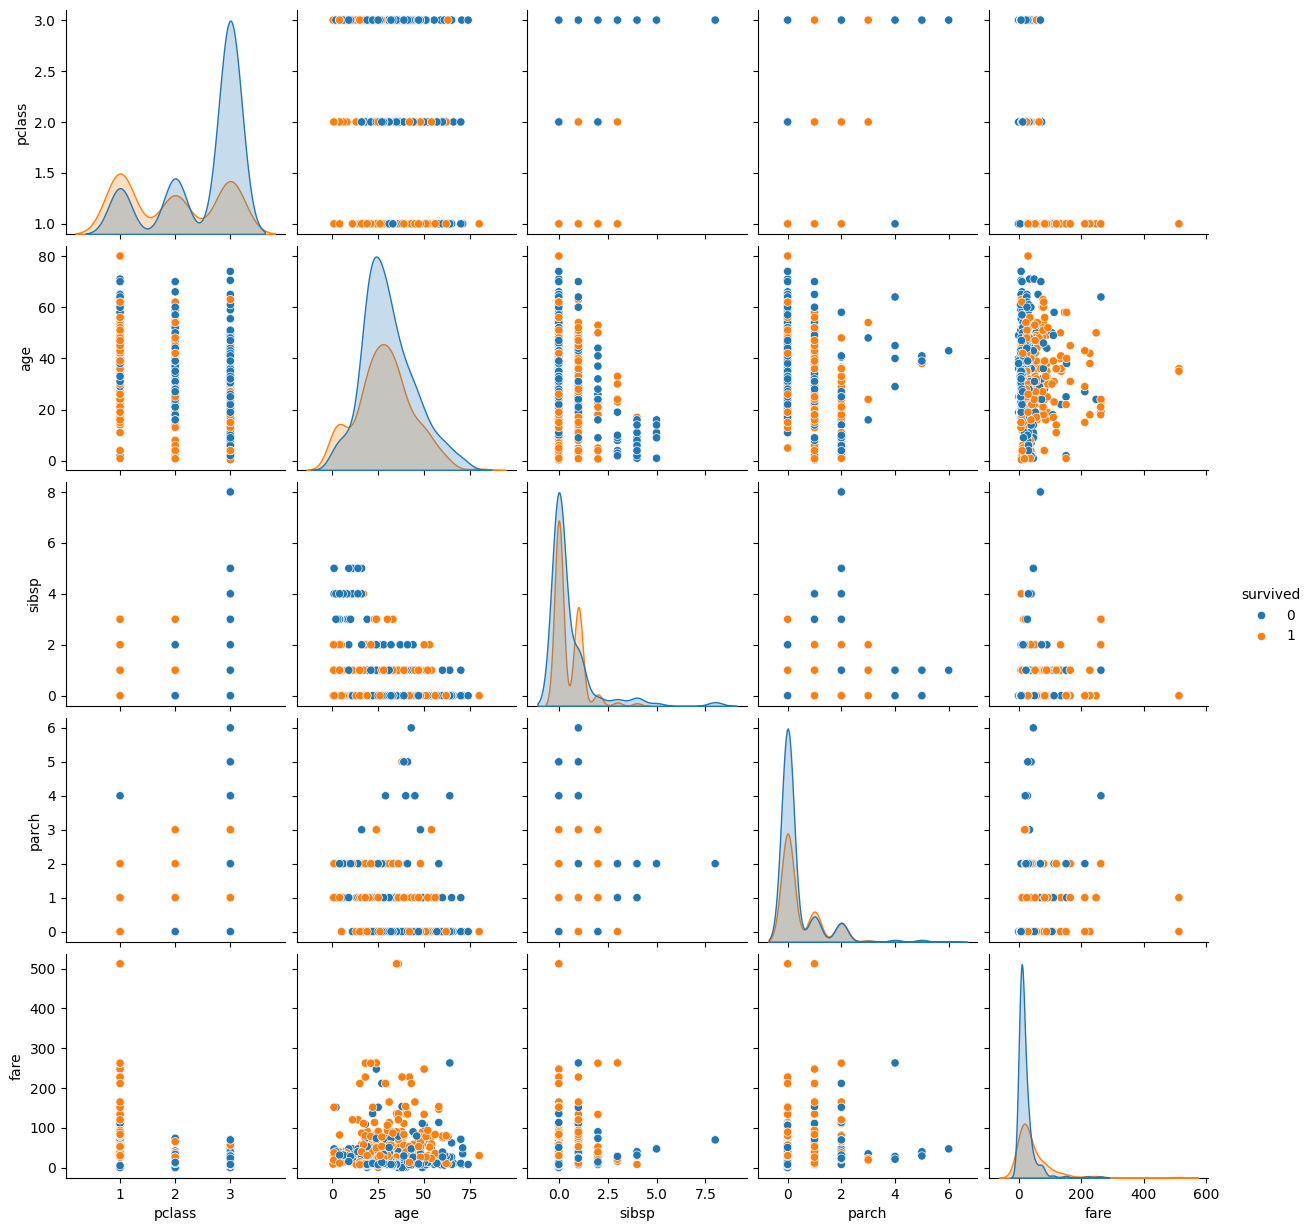

In [22]:
sns.pairplot(data=titanik.select_dtypes(include=['float64', 'int64']), hue='survived');

# Subtasks and Vision of the data Analysis: 

The substasks and vision of the data analysis may be summarized as follows:\
Data Preprocessing:
1. Detecting and handling missing values by replacing the numerikal missing values by mean or average, and replacing the kategorikal missing values by mode, or by removing a feature if it has more than 70% missing values and not has a strong relation to the label.
2. Detecting outliers and removing them using z-score and IQR.
3. Removing duplicates from the dataset.
4. Finally, elaborating the reasons of non-survivals and survivals. 

# Hypothesis of the data:
Null-Hypothesis 1: Female and childern survival rate is higher compared to males.\
Null-Hypothesis 2: The person who paid more has a higher survival rate.\
NUll-Hypothesis 3: The survival rate depends upon the boarding pclass category.

### Project Requirement 3.

Summary of data exploration and actions taken for data cleaning and feature engineering.



### Project Requirement 3 Response - Data Exploration, Cleaning, and Feature Engineering:
1. Data Exploration. Data exploration is discussed using above graphs.
2. Data Cleaning. 
3. Feature Engineering.




In [84]:
titanik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [81]:
titanik.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

# Different types of features in the titanik dataset.

In [85]:
print('categorical_columns: ',titanik.select_dtypes(include=['int64', 'float64']).columns)
print('numerikal_columns: ',titanik.select_dtypes(include=['object', 'category']).columns)
print('bool_columns: ',titanik.select_dtypes(include=['bool']).columns)

categorical_columns:  Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')
numerikal_columns:  Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')
bool_columns:  Index(['adult_male', 'alone'], dtype='object')


# Value types in bool features.

In [87]:
titanik.adult_male.unique()

array([ True, False])

In [88]:
print('The number of rows in titanik dataset: ', len(titanik))

The number of rows in titanik dataset:  891


In [89]:
# 2. Data Cleaning.
# Finding percentage of missin values in the dataset.
missing_percentage = (titanik.isnull().sum() / len(titanik)) * 100 
print('Percentage of Missing Values in Titanic Dataset:')
print(missing_percentage)


Percentage of Missing Values in Titanic Dataset:
survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


I have to consider whether to drop the feature having missing values more than 70% or not. It is important to know its impact on model training. If dropping the feature doesn't significantly affect the model's performance and simplifies the analysis, it might be a reasonable choice.
Some machine learning algorithms can handle missing values, while others may require imputation or preprocessing.

In [13]:
titanik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


The data types of missing features are following:
1. age:          float64---numerikal feature
2. embarked:     object----kategorikal feature
3. deck:         categorikal feature
4. embark_town:  categorikal feature

In [90]:
print('unique values in the deck feature:\n', titanik.deck.unique())
print('The number of missing values in deck feature: ', titanik.deck.isnull().sum())

unique values in the deck feature:
 [NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']
The number of missing values in deck feature:  688


In [91]:
print('unique values in the embark_town feature:\n', titanik.embark_town.unique())
print('The number of missing values in embark_town feature: ', titanik.embark_town.isnull().sum())

unique values in the embark_town feature:
 ['Southampton' 'Cherbourg' 'Queenstown' nan]
The number of missing values in embark_town feature:  2


# Handling Missing values in the dataset.

In [16]:
# Filling the missing values in numerikal feature 'age'.
titanik['age'].fillna(titanik['age'].mean(), inplace=True)
# Filling the missing values in kategorikal feature 'embarked'.
titanik['embarked'].fillna(titanik['embarked'].mode()[0], inplace=True)
# Filling the missing values in kategorikal feature 'embark_town'.
titanik['embark_town'].fillna(titanik['embark_town'].mode()[0], inplace=True)
# Dropping 'deck' column due to high number of missing values
titanik.drop('deck', axis=1, inplace=True)

In [17]:
# Verify that missing values have been handled
print(titanik.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


# Outliers in the Titanik Dataset:
Outliers in a dataset can significantly impact the performance and accuracy of machine learning models. Detecting and handling outliers is an essential step in data preprocessing.

## Outliers Detection in Titanik dataset.
Numerical Features: \
I Used box plots to visualize the distribution of numerical features and identify potential outliers.

In [98]:
# Select numerical features for checking outliers.
numerical_features = titanik.select_dtypes(include = ['int64', 'float64'])

# Display the list of numerical features
print('Numerical Features in Titanic Dataset:')
print(numerical_features.columns.tolist())

Numerical Features in Titanic Dataset:
['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


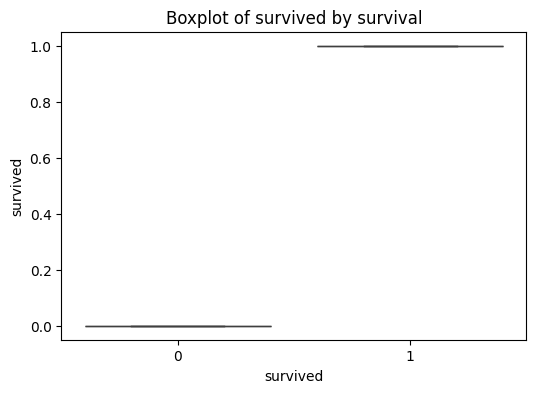

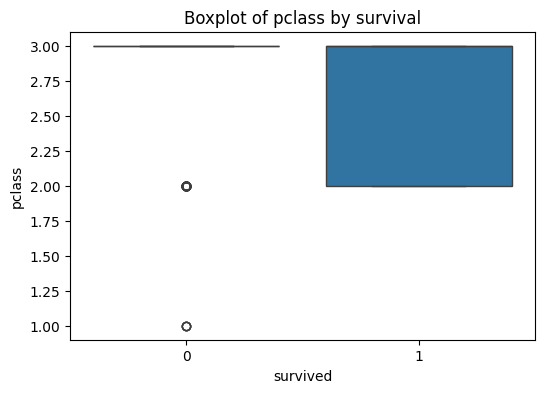

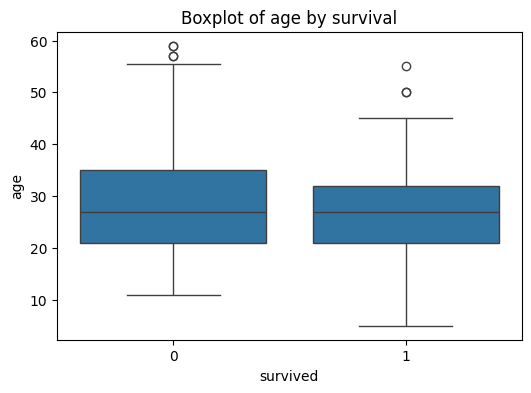

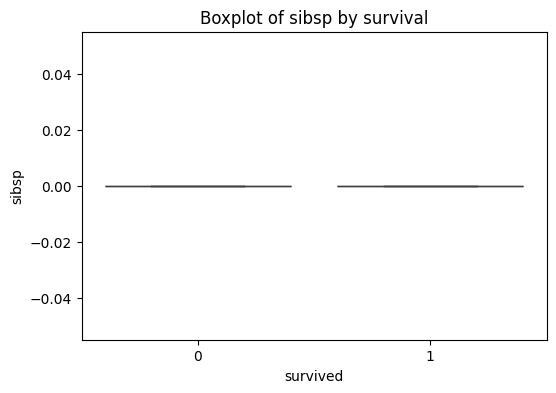

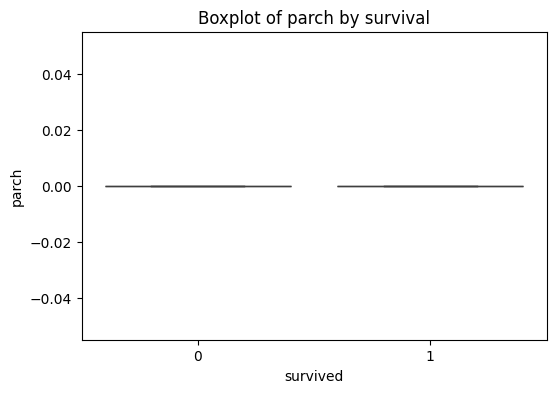

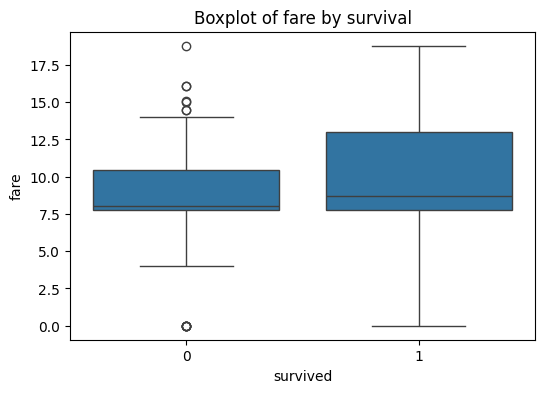

In [99]:
# Create box plots for numerical features to detect outliers.
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='survived', y=feature, data=titanik)
    plt.title(f'Boxplot of {feature} by survival')

## Outliers Removal in Titanik dataset.
Statistical Methods:\
I Used one of statistical methods like Z-score or IQR (Interquartile Range) to remove outliers.

In [96]:
# Selecting numerical features
numerical_features = titanik.select_dtypes(include=['int64', 'float64']).columns

# function to remove outliers using IQR
def remove_outliers_iqr(data, feature, threshold=1.5):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

# Loop through each numerical feature and remove outliers
for feature in numerical_features:
    titanik = remove_outliers_iqr(titanik, feature)

# DataFrame after removing outliers
print("Titanic Dataset after Removing Outliers:")
print(titanik.head())


Titanic Dataset after Removing Outliers:
    survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
2          1       3  female  26.0      0      0   7.9250        S   Third   
4          0       3    male  35.0      0      0   8.0500        S   Third   
12         0       3    male  20.0      0      0   8.0500        S   Third   
14         0       3  female  14.0      0      0   7.8542        S   Third   
15         1       2  female  55.0      0      0  16.0000        S  Second   

      who  adult_male deck  embark_town alive  alone  
2   woman       False  NaN  Southampton   yes   True  
4     man        True  NaN  Southampton    no   True  
12    man        True  NaN  Southampton    no   True  
14  child       False  NaN  Southampton    no   True  
15  woman       False  NaN  Southampton   yes   True  


# Boxplots after removing outliers.

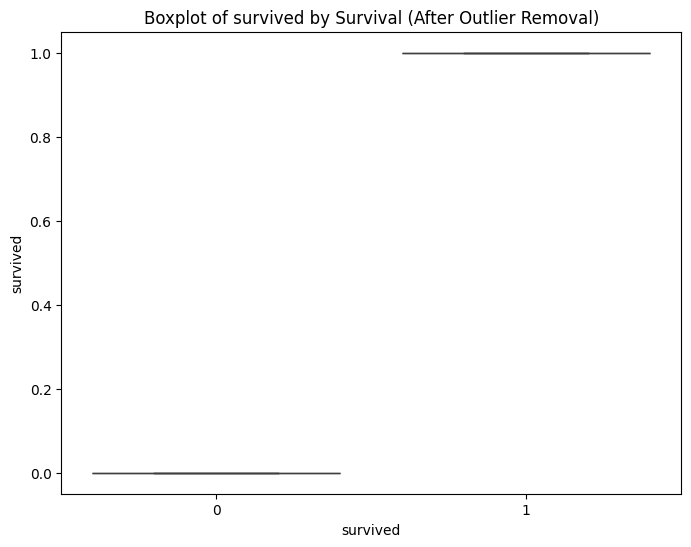

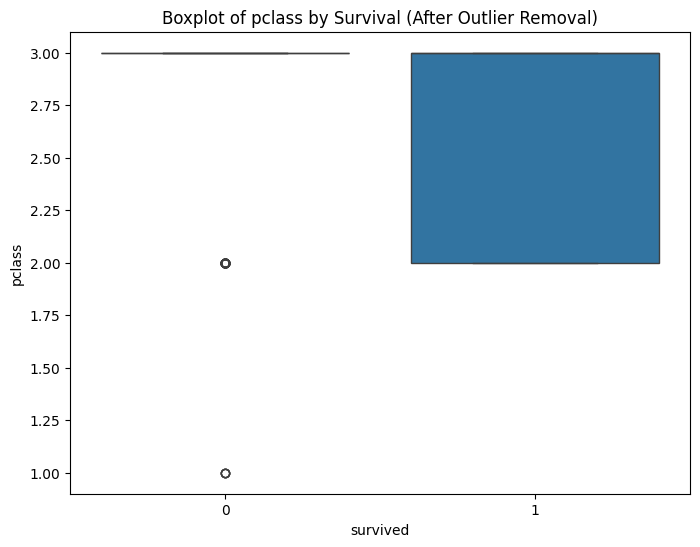

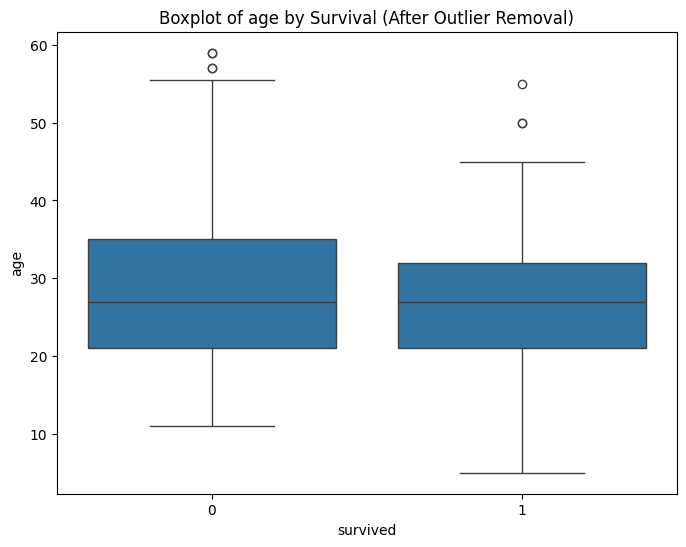

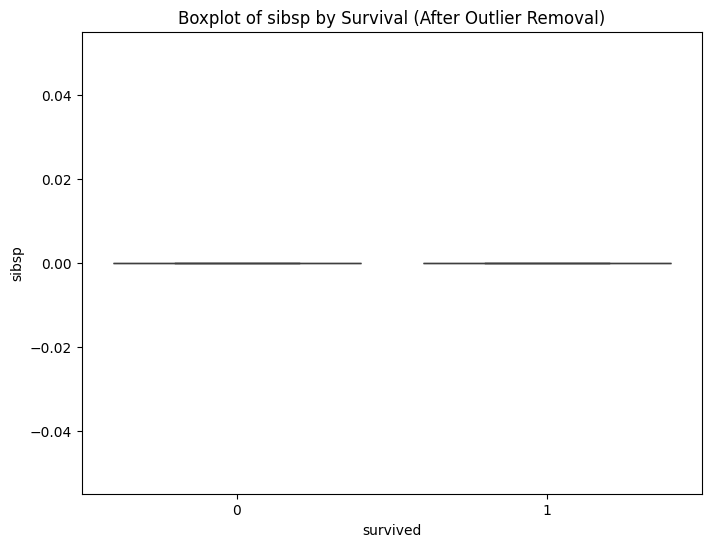

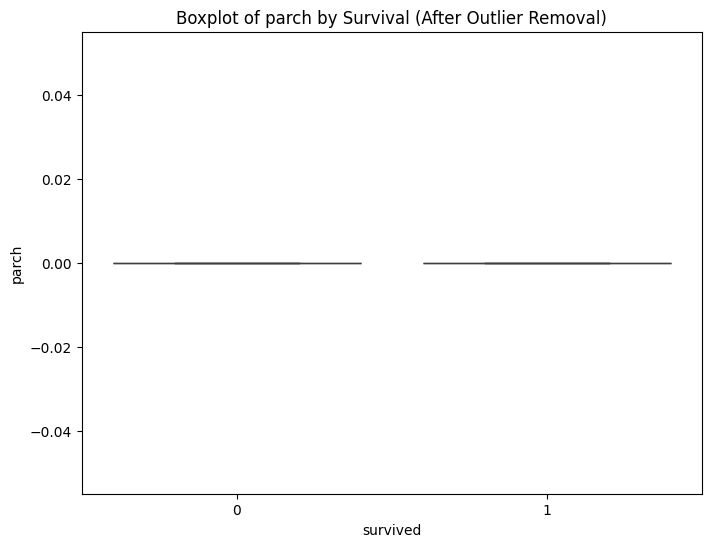

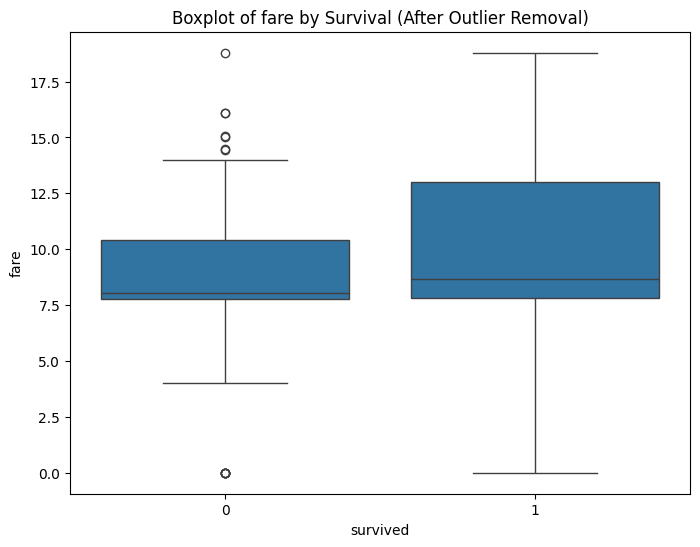

In [97]:
# Create box plots for numerical features after outlier removal
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='survived', y=feature, data=titanik)
    plt.title(f'Boxplot of {feature} by Survival (After Outlier Removal)')

# 3. Feature Engineering.

In [58]:
titanik = sns.load_dataset('titanic')
titanik.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [65]:
# Creating a 'FamilySize' feature by combining 'SibSp' and 'Parch'
titanik['FamilySize'] = titanik['sibsp'] + titanik['parch']

# Display the modified dataset
print(titanik.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  FamilySize  
0    man        True  NaN  Southampton    no  False           1  
1  woman       False    C    Cherbourg   yes  False           1  
2  woman       False  NaN  Southampton   yes   True           0  
3  woman       False    C  Southampton   yes  False           1  
4    man        True  NaN  Southampton    no   True           0  


In [67]:
# Modified Feature.
print(titanik[['sibsp', 'parch', 'FamilySize']])

     sibsp  parch  FamilySize
0        1      0           1
1        1      0           1
2        0      0           0
3        1      0           1
4        0      0           0
..     ...    ...         ...
886      0      0           0
887      0      0           0
888      1      2           3
889      0      0           0
890      0      0           0

[891 rows x 3 columns]


In [33]:
titanik.sex.unique()

array(['male', 'female'], dtype=object)

In [34]:
# Encode 'Sex' variable for map korrelation matrix
titanik['sex'] = titanik['sex'].map({'male': 0, 'female': 1})
titanik.sex.unique()


array([0, 1], dtype=int64)

In [ ]:
# Correlation heatmap
correlation_matrix = titanik.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Correlation heatmap
korrelation_matrix = titanik.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='0.2f')
plt.title('Correlation heatmap')


In [70]:
# Select categorical columns
categorical_columns = titanik.select_dtypes(include=['object']).columns.tolist()

# Display the names of categorical columns
print("Categorical Columns in Titanic Dataset:")
print(categorical_columns)


Categorical Columns in Titanic Dataset:
['sex', 'embarked', 'who', 'embark_town', 'alive']


Converting categorical columns into numerical format is essential before applying a linear regression model, as most machine learning models require numerical input. Two common techniques for converting categorical columns to numerical representations are Label Encoding and One-Hot Encoding. 

# Label Enkoding

In [109]:
print(titanik.dtypes)

survived          int64
pclass            int64
sex               int32
age             float64
sibsp             int64
parch             int64
fare            float64
embarked          int32
class          category
who               int32
adult_male         bool
deck           category
embark_town       int32
alive             int32
alone              bool
dtype: object


In [111]:
from sklearn.preprocessing import LabelEncoder

# Identify and convert categorical columns to numerical using Label Encoding
label_encoder = LabelEncoder()

# Loop through each categorical column and apply Label Encoding
for column in titanik.columns:
    titanik[column] = label_encoder.fit_transform(titanik[column])

# Display the DataFrame with converted numerical values
print("Titanic Dataset Converted to Numerical:")
print(titanik.dtypes)


Titanic Dataset Converted to Numerical:
survived       int64
pclass         int64
sex            int64
age            int64
sibsp          int64
parch          int64
fare           int64
embarked       int64
class          int64
who            int64
adult_male     int64
deck           int64
embark_town    int64
alive          int64
alone          int64
dtype: object


### Project Requirement 4.

Summary of training three different classifier models, having different nature in explainability and predictability. The models used for the project are:  
1. Logistic Regression 
2. Random Forest
3. SVM

# Project Requirement 4 Response - Training Three Classifier Models:
In the context of the Titanic dataset, I will train three different classifier models with varying natures in terms of explainability and predictability. The chosen models for this example are Logistic Regression, Random Forest, and Support Vector Machine (SVM). Logistic Regression is often considered interpretable, Random Forest is an ensemble method known for its predictive power, and SVM is known for its ability to handle complex relationships.

In [112]:
print(titanik.dtypes)

survived       int64
pclass         int64
sex            int64
age            int64
sibsp          int64
parch          int64
fare           int64
embarked       int64
class          int64
who            int64
adult_male     int64
deck           int64
embark_town    int64
alive          int64
alone          int64
dtype: object


### 1. Linear Regression model to predikt survivals.

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Extrakting features and target variables.
X = titanik.drop(['survived'], axis=1)
y = titanik['survived']

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  

# Splitting the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Intialize and train the Logistik Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model.
accuracy_lr = accuracy_score(y_pred_lr, y_test)
classification_report_lr = classification_report(y_test, y_pred_lr)

# Print values.
print("Logistic Regression Model:")
print("Accuracy:", accuracy_lr)
print("Classification Report:\n", classification_report_lr)

Logistic Regression Model:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        25

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



# 2.Random Forest  

In [119]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Model:")
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report_rf)


Random Forest Model:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        25

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



# 3. Support Vector Machine

In [120]:
from sklearn.svm import SVC

# Initialize and train the Support Vector Machine model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predictions on the scaled test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

print("Support Vector Machine Model:")
print("Accuracy:", accuracy_svm)
print("Classification Report:\n", classification_report_svm)


Support Vector Machine Model:
Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84        65
           1       0.00      0.00      0.00        25

    accuracy                           0.72        90
   macro avg       0.36      0.50      0.42        90
weighted avg       0.52      0.72      0.61        90



c:\Users\shahzad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\shahzad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\shahzad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

### Response to Project Requirement 5.

The reasons for selecting these classifier models as a final model that best fits our needs in terms of accuracy and explainability. I would prefer Logistic Regression and Random Forest due to higher accuracy compared to SVM, as SVM has 0.72 accuracy.

### Project Requirement 6.

Summary Key Findings and Insights, which walks our reader through the main drivers of our model and insights from our data derived from our classifier model.

### Project Requirement 6 Response - Key Findings and Insights:

After training and evaluating the classifier models on the Titanic dataset, I gained valuable insights into the main drivers of the models and important patterns within the data. Here are the key findings:

#### 1. Logistic Regression Insights:

  - The coefficients of the logistic regression model provide insights into the impact of each feature on the likelihood of survival.
  
  - Features such as 'Pclass' and 'Sex' may have significant impacts on survival.

#### 2. Random Forest Insights:

- Random Forest provides a feature importance ranking, indicating the contribution of each feature to the overall predictive performance.

- Random Forest can capture non-linear relationships, providing a more nuanced understanding of how combinations of features impact survival.

#### 3. Support Vector Machine (SVM) Insights:

- SVM excels in capturing complex decision boundaries in the data.

- SVM benefits from feature scaling, ensuring that all features contribute equally to the decision-making process.

#### General Insights:

- Passenger class ('Pclass') appears to be a significant factor influencing survival, with higher-class passengers having better odds.
- Gender ('Sex') is a crucial determinant, with females generally having higher survival rates.
- The relationship between age and survival is nuanced. While certain age groups may have higher survival rates, the impact varies among models.
- The engineered feature 'FamilySize' (combining 'SibSp' and 'Parch') may have relevance in predicting survival.
- Consideration of features like 'Pclass' and 'Sex' is crucial in predicting survival.
- Feature engineering, such as creating composite features like 'FamilySize,' can enhance model performance.
- The choice of model depends on the project's priorities—opt for Logistic Regression for high interpretability, Random Forest for a balance, or SVM for handling complex relationships.

### Project Requirement 7.

Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model after adding specific data features that may help us to achieve a better explanation or a better prediction.



### Project Requirement 7 Response - Next Steps and Suggestions:

The analysis of the Titanic dataset has provided valuable insights, but there are several opportunities for further exploration and enhancement. Here are some suggestions for next steps:

#### 1. **Feature Engineering:**
   - **Age Groups:** Instead of treating age as a continuous variable, create age groups or bins. This can capture non-linear relationships more effectively.
   
#### 2. **Handling Missing Values:**
   - **Deck Information:** While 'Deck' was dropped due to many missing values, exploring patterns related to cabin location (if available) might provide insights into survival.

#### 3. **Advanced Modeling Techniques:**
   - **Ensemble Methods:** Explore advanced ensemble methods like Gradient Boosting, which can often outperform individual models by combining their strengths.
   
#### 4. **Temporal Analysis:**
   - **Time-Based Trends:** Explore whether there are temporal trends or variations in survival rates. This could involve analyzing the data based on the order in which passengers boarded.

#### 5. **Interaction Effects:**
   - **Feature Interactions:** Investigate potential interactions between features. For example, the combination of certain age groups with specific passenger classes or genders may have a more pronounced effect on survival.

#### 6. **Cross-Validation and Robustness Testing:**
   - **Cross-Validation:** Implement robust cross-validation techniques to ensure the models generalize well to new data.